In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Crear el slider con una frecuencia inicial diferente
slider = widgets.FloatSlider(value=30, min=10, max=150, step=5, description="Frecuencia f:")
display(slider)

def actualizar_grafica(f):
    t = np.linspace(0, 1, 1000)
    x = np.sin(2 * np.pi * 7 * t) + np.sin(2 * np.pi * f * t)  # Se cambió 5 Hz a 7 Hz
    x2 = np.sin(2 * np.pi * f * t)
    x3 = np.sin(2 * np.pi * 10 * t)  # Nueva señal con 10 Hz
    convol = np.convolve(x, x2, mode="same")

    clear_output(wait=True)
    display(slider)

    plt.figure(figsize=(14, 3))

    plt.subplot(1, 3, 1)
    plt.plot(t, x, label="x = sin(2π7t) + sin(2πft)", color='blue', alpha=0.8)
    plt.title("Señal x(t)")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(t, x2, label="x2 = sin(2πft)", color='red', linestyle="dotted")
    plt.title("Señal x2(t)")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(t, x3, label="x3 = sin(2π10t)", color='purple', linestyle="dashed")
    plt.title("Señal x3(t)")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(13, 3))
    plt.plot(convol, label="Convolución x * x2", color='green', linewidth=2)
    plt.title("Convolución de x y x2")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.show()

# Conectar el slider con la función de actualización
widgets.interactive(actualizar_grafica, f=slider)


FloatSlider(value=30.0, description='Frecuencia f:', max=150.0, min=10.0, step=5.0)

interactive(children=(FloatSlider(value=30.0, description='Frecuencia f:', max=150.0, min=10.0, step=5.0), Out…

In [3]:
!pip install PyWavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 27.8 MB/s eta 0:00:00


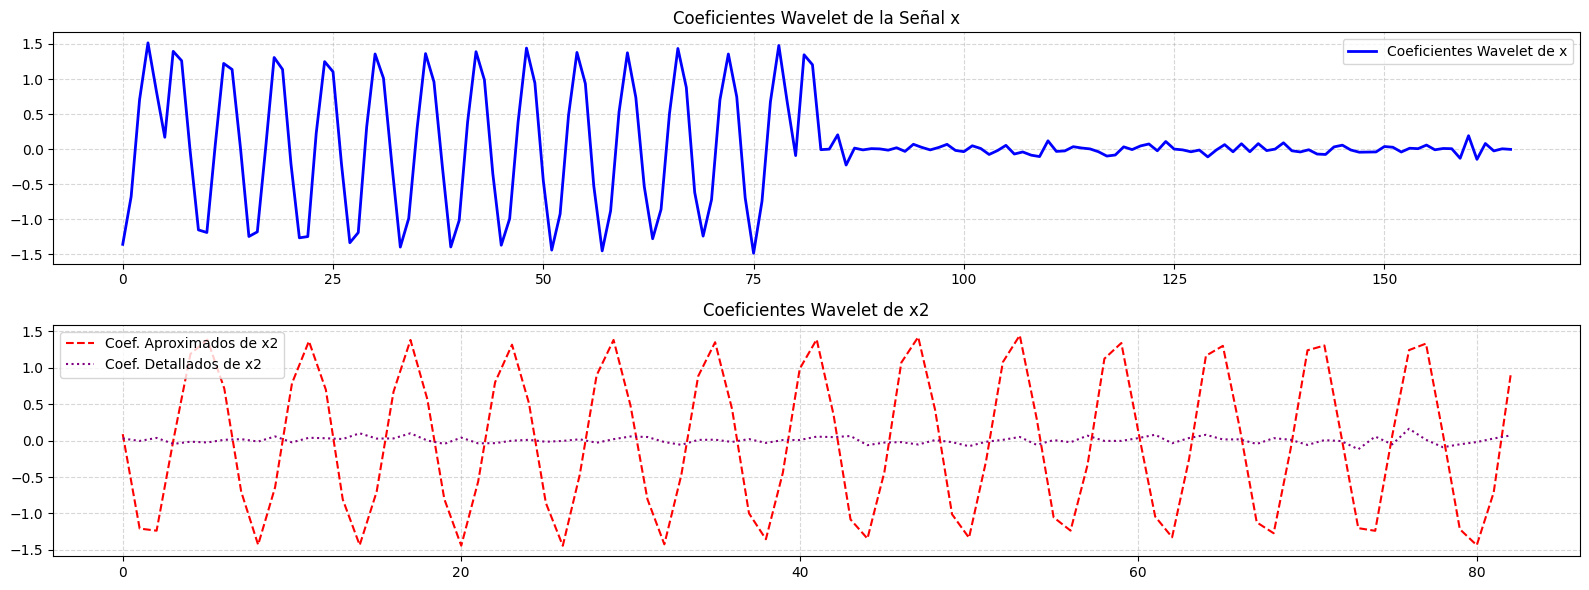

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Generar señales con más muestras y menos ruido
x = np.sin(np.linspace(0, 25 * np.pi, 150)) + np.random.normal(0, 0.05, 150)
x2 = np.cos(np.linspace(0, 25 * np.pi, 150)) + np.random.normal(0, 0.05, 150)

# Cambiar la base wavelet a 'coif3'
wav = 'coif3'
a_x, d_x = pywt.dwt(x, wav)
a_x2, d_x2 = pywt.dwt(x2, wav)

# Concatenar coeficientes wavelet
convol = np.concatenate((a_x, d_x))

# Graficar las señales y los coeficientes Wavelet
plt.figure(figsize=(16, 6))

plt.subplot(2, 1, 1)
plt.plot(convol, label="Coeficientes Wavelet de x", color='blue', linewidth=2)
plt.title("Coeficientes Wavelet de la Señal x")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(a_x2, label="Coef. Aproximados de x2", color='red', linestyle="dashed")
plt.plot(d_x2, label="Coef. Detallados de x2", color='purple', linestyle="dotted")
plt.title("Coeficientes Wavelet de x2")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()
